In [3]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
import os
import warnings
import zipfile
from tld import get_tld
from urllib.parse import urlparse
import re
warnings.filterwarnings('ignore')

In [4]:
%pwd

'c:\\Users\\fifty\\OneDrive\\Desktop\\AI - Data Science\\Mlops\\Malicious_QR_Code_Detection\\research'

In [5]:
os.chdir("../")

In [6]:
%pwd

'c:\\Users\\fifty\\OneDrive\\Desktop\\AI - Data Science\\Mlops\\Malicious_QR_Code_Detection'

In [7]:
df = pd.read_csv(r'csv\balanced_urls.csv')

In [8]:
df.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632506 entries, 0 to 632505
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     632506 non-null  object
 1   label   632506 non-null  object
 2   result  632506 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 14.5+ MB


In [10]:
df['label'].value_counts()

label
benign       316254
malicious    316252
Name: count, dtype: int64

In [11]:
df['result'].value_counts()

result
0    316254
1    316252
Name: count, dtype: int64

In [12]:
# function to extract domain from url using get_tld library\

def extract_url_domain(url):
    try:
        res = get_tld(url, as_object=True, fail_silently=False, fix_protocol= True)
        pri_domain = res.parsed_url.netloc
    except:
        pri_domain = None

    return pri_domain

def url_len(url):
    length = str(len(url))
    return int(length)


# function to extract secure https url

def httpSecure(url):
    https = urlparse(url).scheme
    match = str(https)

    if match == 'https':
        return 0
    else:
        return 1

# no of digits counts in url

def no_of_digits(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits+=1
    
    return digits

def letter_count(url):
    letter = 0
    for i in url:
        if i.isalpha():
            letter+=1
    
    return letter

def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

#first directory length    
def fd_length(url):
    urlpath = urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def process_urls(df):

    feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']

    df['url_len'] = df['url'].apply(lambda i: url_len(i))
    df['httpSecure'] = df['url'].apply(lambda i: httpSecure(i))
    df['no_of_digits'] = df['url'].apply(lambda i: no_of_digits(i))
    df['letter_count'] = df['url'].apply(lambda i: letter_count(i))
    df['Shortining_Service'] = df['url'].apply(lambda i: Shortining_Service(i))
    df['having_ip_address'] = df['url'].apply(lambda i: having_ip_address(i))
    df['path_length'] = df['url'].apply(lambda i: len(urlparse(i).path))
    df['fd_length'] = df['url'].apply(lambda i: fd_length(i))
    df['count-www'] = df['url'].apply(lambda i: i.count('www'))
    df['count-dir'] = df['url'].apply(lambda i: no_of_dir(i))

    for a in feature:
        df[a] = df['url'].apply(lambda i: i.count(a))



In [13]:
df.head()

,url,label,result
0,https://www.google.com,benign,0
1,https://www.youtube.com,benign,0
2,https://www.facebook.com,benign,0
3,https://www.baidu.com,benign,0
4,https://www.wikipedia.org,benign,0


In [14]:
df = df.drop(columns=['label'])
df.head()

,url,result
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


In [15]:
X = df.iloc[:,0]
y = df.iloc[:,1]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [17]:
y_train.shape

(506004,)

In [18]:
X_train.shape

(506004,)

In [19]:
X_train_df = pd.DataFrame(X_train,columns=['url'])

In [20]:
X_train_df.reset_index(inplace=True)

In [21]:
X_train_df.drop(columns=['index'],inplace=True)

In [22]:
X_train_df.head()

,url
0,http://ulmicsulfa.net/fm32yz2
1,http://free4u.co.za/aol/ok/gduc/
2,https://www.linkedin.com/pub/dir/samuel/merritt
3,https://www.legacy.com/obituaries/mycentraljer...
4,354cf0bd.ngrok.io


In [23]:
X_test = pd.DataFrame(X_test,columns=['url'])
X_test.reset_index(inplace=True)
X_test.drop(columns=['index'],inplace=True)
X_test.head()

,url
0,https://www.morganstanley.com/
1,https://www.alta.aero/2010/
2,http://www.beriva.lt/index.html?di=akcijos&Z=1...
3,https://www.checkoutmycards.com/Players/Baseba...
4,http://www.adriaszalon.hu/index.php?option=com...


In [24]:
process_urls(X_train_df)

In [25]:
X_train_df.head()

,url,url_len,httpSecure,no_of_digits,letter_count,Shortining_Service,having_ip_address,path_length,fd_length,count-www,...,=,.,#,%,+,$,!,*,",",//
0,http://ulmicsulfa.net/fm32yz2,29,1,3,21,0,0,8,7,0,...,0,1,0,0,0,0,0,0,0,1
1,http://free4u.co.za/aol/ok/gduc/,32,1,1,22,0,0,13,3,0,...,0,2,0,0,0,0,0,0,0,1
2,https://www.linkedin.com/pub/dir/samuel/merritt,47,0,0,38,0,0,23,3,1,...,0,2,0,0,0,0,0,0,0,1
3,https://www.legacy.com/obituaries/mycentraljer...,101,0,9,77,0,0,41,10,1,...,2,3,0,0,0,0,0,0,0,1
4,354cf0bd.ngrok.io,17,1,4,11,0,0,17,0,0,...,0,2,0,0,0,0,0,0,0,0


In [26]:
X_train_df.drop(columns=['url'],inplace=True)

In [27]:
X_train_df.shape

(506004, 23)

In [28]:
y_train.shape

(506004,)

In [29]:
X_train,X_val,y_train,y_val = train_test_split(X_train_df,y_train,random_state=42,test_size=0.2,stratify=y_train)

In [30]:
import pickle

In [31]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)


In [32]:
with open('scaler.pkl','rb') as file:
    ss = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [73]:
# Define the model
model = Sequential()

# Input layer with L2 regularization
model.add(Dense(32, activation='relu', input_shape=(23,), kernel_regularizer=l2(0.01)))

# Add Dropout
model.add(Dropout(0.2))  # 20% dropout

# Hidden layer with L2 regularization
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))

# Add Dropout
model.add(Dropout(0.2))  # 20% dropout

# Hidden layer with L2 regularization
# model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))

# Add Dropout
# model.add(Dropout(0.2))  # 20% dropout

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Display the summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313 (5.13 KB)

 Trainable params: 1,313 (5.13 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['acc'])

In [75]:
checkpointer = ModelCheckpoint(
    'best_model.keras',             # Filepath to save the model
    monitor='val_acc',    # Metric to monitor for improvement
    mode='max',           # Save model when the monitored metric is maximized
    verbose=2,            # Print messages when saving the model
    save_best_only=True,   # Only save the model if it's the best so far
)

In [76]:
history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpointer])

Epoch 1/10
3156/3163 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - acc: 0.9791 - loss: 0.2369
Epoch 1: val_acc improved from -inf to 0.99507, saving model to best_model.keras
3163/3163 ━━━━━━━━━━━━━━━━━━━━ 5s 990us/step - acc: 0.9792 - loss: 0.2366 - val_acc: 0.9951 - val_loss: 0.0504
Epoch 2/10
3126/3163 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - acc: 0.9948 - loss: 0.0526
Epoch 2: val_acc did not improve from 0.99507
3163/3163 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.9948 - loss: 0.0525 - val_acc: 0.9950 - val_loss: 0.0419
Epoch 3/10
3091/3163 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - acc: 0.9949 - loss: 0.0445
Epoch 3: val_acc improved from 0.99507 to 0.99514, saving model to best_model.keras
3163/3163 ━━━━━━━━━━━━━━━━━━━━ 3s 963us/step - acc: 0.9949 - loss: 0.0444 - val_acc: 0.9951 - val_loss: 0.0375
Epoch 4/10
3152/3163 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - acc: 0.9950 - loss: 0.0404
Epoch 4: val_acc improved from 0.99514 to 0.99584, saving model to best_model.keras
3163/3163 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [77]:
X_test.head()

,url
0,https://www.morganstanley.com/
1,https://www.alta.aero/2010/
2,http://www.beriva.lt/index.html?di=akcijos&Z=1...
3,https://www.checkoutmycards.com/Players/Baseba...
4,http://www.adriaszalon.hu/index.php?option=com...


In [78]:
process_urls(X_test)

In [81]:
X_test.head()

,url_len,httpSecure,no_of_digits,letter_count,Shortining_Service,having_ip_address,path_length,fd_length,count-www,count-dir,...,=,.,#,%,+,$,!,*,",",//
0,30,0,0,24,0,0,1,0,1,1,...,0,2,0,0,0,0,0,0,0,1
1,27,0,4,16,0,0,6,4,1,2,...,0,2,0,0,0,0,0,0,0,1
2,57,1,7,37,0,0,11,10,1,1,...,3,3,0,0,0,0,0,0,0,1
3,50,0,0,42,0,0,19,7,1,3,...,0,2,0,0,0,0,0,0,0,1
4,120,1,10,87,0,0,10,9,1,1,...,5,3,0,0,0,0,0,0,0,1


In [80]:
X_test.drop(columns=['url'],inplace=True)

In [82]:
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [83]:
X_test = scaler.transform(X_test)

In [84]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

In [85]:
y_test_pred = best_model.predict(X_test)

3954/3954 ━━━━━━━━━━━━━━━━━━━━ 2s 564us/step


In [90]:
y_test_binary = [0 if prob < 0.5 else 1 for prob in y_test_pred]

In [87]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, roc_curve

In [91]:
print(classification_report(y_test,y_test_binary))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     63251
           1       1.00      0.99      1.00     63251

    accuracy                           1.00    126502
   macro avg       1.00      1.00      1.00    126502
weighted avg       1.00      1.00      1.00    126502



### Feature Engneering

In [6]:
df = df.drop(columns=['url','label'])
df.head()

,result,url_len,httpSecure,no_of_digits,letter_count,Shortining_Service,having_ip_address,path_length,fd_length,count-www,...,=,.,#,%,+,$,!,*,",",//
0,0,22,0,0,17,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,1
1,0,23,0,0,18,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,1
2,0,24,0,0,19,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,1
3,0,21,0,0,16,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,1
4,0,25,0,0,20,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,1


In [17]:
import pickle
from sklearn.preprocessing import StandardScaler

In [13]:
with open('scaler.pkl','rb') as file:
    ss = pickle.load(file)

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)

In [20]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(ss, file)

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [19]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [21]:
rf = RandomForestClassifier(random_state=42)

params = [
    {
        'model': [rf],
        'model__n_estimators':[100,200,300],
        'model__criterion':['gini'],
        'model__max_depth':[5,7,9],
        'model__oob_score':[True],
           
    }]

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('model', rf)])

grid_search = GridSearchCV(estimator=pipeline,param_grid=params,cv=3,n_jobs=-1,verbose=2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(max_depth=9,
                                                               oob_score=True,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier(max_depth=9,
                                                           oob_score=True,
                                                           random_state=42)],
                          'model__criterion': ['gini'],
                          'model__max_depth': [5, 7, 9],
                          'model__n_estimators': [100, 200, 300],
                          'model__oob_score': [True]}],
             verbose=2)

In [22]:
grid_search.best_score_

0.9962080319696164

In [23]:
best_model = grid_search.best_estimator_

In [22]:
X_train.shape

(404803, 23)

In [27]:
# Define the model
model = Sequential()

# Input layer with L2 regularization
model.add(Dense(32, activation='relu', input_shape=(23,), kernel_regularizer=l2(0.01)))

# Add Dropout
model.add(Dropout(0.2))  # 20% dropout

# Hidden layer with L2 regularization
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))

# Add Dropout
model.add(Dropout(0.2))  # 20% dropout

# Hidden layer with L2 regularization
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))

# Add Dropout
model.add(Dropout(0.2))  # 20% dropout

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Display the summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer= 'adam',loss='binary_crossentropy',metrics=['acc'])

In [29]:
checkpointer = ModelCheckpoint(
    'best_model.keras',             # Filepath to save the model
    monitor='val_acc',    # Metric to monitor for improvement
    mode='max',           # Save model when the monitored metric is maximized
    verbose=2,            # Print messages when saving the model
    save_best_only=True,   # Only save the model if it's the best so far
)

In [30]:
history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpointer])

Epoch 1/10
3158/3163 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - acc: 0.9493 - loss: 0.3190
Epoch 1: val_acc improved from -inf to 0.99557, saving model to best_model.keras
3163/3163 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - acc: 0.9494 - loss: 0.3187 - val_acc: 0.9956 - val_loss: 0.0644
Epoch 2/10
3122/3163 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - acc: 0.9928 - loss: 0.0767
Epoch 2: val_acc improved from 0.99557 to 0.99572, saving model to best_model.keras
3163/3163 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.9928 - loss: 0.0766 - val_acc: 0.9957 - val_loss: 0.0537
Epoch 3/10
3162/3163 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - acc: 0.9931 - loss: 0.0664
Epoch 3: val_acc improved from 0.99572 to 0.99576, saving model to best_model.keras
3163/3163 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.9931 - loss: 0.0664 - val_acc: 0.9958 - val_loss: 0.0496
Epoch 4/10
3100/3163 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - acc: 0.9935 - loss: 0.0598
Epoch 4: val_acc improved from 0.99576 to 0.99587, saving model to best_model.keras


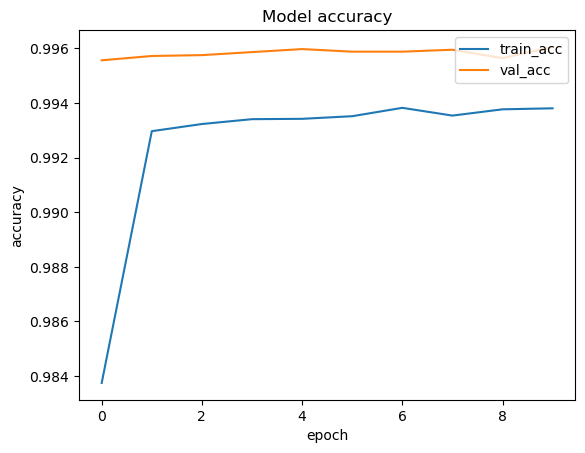

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

In [24]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, roc_curve

In [33]:
best_model = model

In [17]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

In [25]:
y_pred = best_model.predict(X_val)

In [35]:
y_binary = [0 if prob < 0.5 else 1 for prob in y_pred ]

In [27]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     50601
           1       1.00      0.99      1.00     50600

    accuracy                           1.00    101201
   macro avg       1.00      1.00      1.00    101201
weighted avg       1.00      1.00      1.00    101201



[[50481   120]
 [  267 50333]]


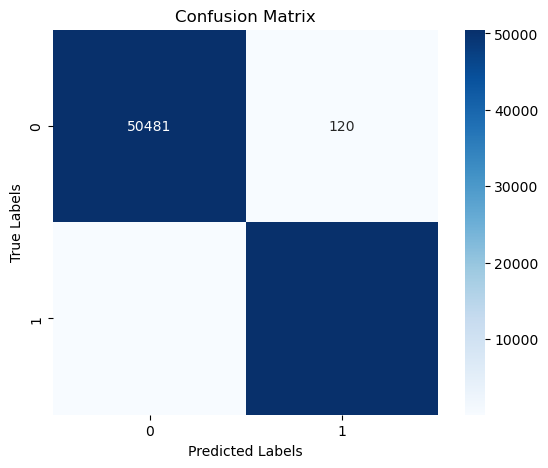

In [28]:
cm = confusion_matrix(y_val,y_pred)
print(cm)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues',square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
def process_urls_test_raw(urls):

    data = {}
    feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']

    data = {
        'url_len': urls.apply(lambda i: url_len(i)),
        'httpSecure': urls.apply(lambda i: httpSecure(i)),
        'no_of_digits':urls.apply(lambda i: no_of_digits(i)),
        'letter_count':urls.apply(lambda i: letter_count(i)),
        'Shortining_Service':urls.apply(lambda i: Shortining_Service(i)),
        'having_ip_address':urls.apply(lambda i: having_ip_address(i)),
        'path_length': urls.apply(lambda i: len(urlparse(i).path)),
        'fd_length': urls.apply(lambda i: fd_length(i)),
        'count-www': urls.apply(lambda i: i.count('www')),
        'count-dir': urls.apply(lambda i: no_of_dir(i))       
    }

    for a in feature:
        data[a] = urls.apply(lambda i: i.count(a))

    return pd.DataFrame(data)

In [29]:
def predict_url(url_list):

    urls = pd.Series(url_list)

    features_df = process_urls_test_raw(urls)

    features_scaled = ss.transform(features_df)

    predictions = best_model.predict(features_scaled)

    return predictions

new_urls = [
    # Safe URLs
    "https://www.google.com",
    "https://www.facebook.com",
    "https://www.wikipedia.org",
    "https://www.github.com",
    
    # Phishing-like URLs
    "http://login-paypa1.com",   # Looks like a PayPal phishing site
    "http://secure-bank-update.net",  # Fake banking update
    "https://faceb00k-secure-login.com",  # Fake Facebook login
    
    # Malware-like URLs
    "http://free-downloads-softwares.xyz",  # Common malware distribution site
    "https://get-rich-fast-now.biz",  # Scam/malware-like domain
    "http://win-big-prizes-clickhere.com",  # Suspicious-looking clickbait URL
    'https://www.youtube.com/watch?v=A5_w2JgLg1s'
]

predictions = predict_url(new_urls)

# Display predictions
for url, prediction in zip(new_urls, predictions):
    print(f"URL: {url} -> Prediction: {0 if prediction < 0.5 else 1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
URL: https://www.google.com -> Prediction: 0
URL: https://www.facebook.com -> Prediction: 0
URL: https://www.wikipedia.org -> Prediction: 0
URL: https://www.github.com -> Prediction: 0
URL: http://login-paypa1.com -> Prediction: 1
URL: http://secure-bank-update.net -> Prediction: 1
URL: https://faceb00k-secure-login.com -> Prediction: 1
URL: http://free-downloads-softwares.xyz -> Prediction: 1
URL: https://get-rich-fast-now.biz -> Prediction: 1
URL: http://win-big-prizes-clickhere.com -> Prediction: 1
URL: https://www.youtube.com/watch?v=A5_w2JgLg1s -> Prediction: 0


In [3]:
import qrcode
from pyzbar.pyzbar import decode
from PIL import Image

# Step 1: Create a QR code
url = "http://haystak5njsmn2hqkewecpaxetahtwhsbsa64jom2k22z5afxhnpxfid.onion/"
qr = qrcode.QRCode()
qr.add_data(url)
qr.make()
qr_image = qr.make_image(fill_color="black", back_color="white")
qr_image.save("dark_web_code.png")  # Save QR code as an image

# Step 2: Decode the QR code
decoded_data = decode(Image.open("dark_web_code.png"))
if decoded_data:
    extracted_url = decoded_data[0].data.decode("utf-8")
    
    print("Extracted URL:", extracted_url)
else:
    print("No QR code detected.")


Extracted URL: http://haystak5njsmn2hqkewecpaxetahtwhsbsa64jom2k22z5afxhnpxfid.onion/


In [8]:
from tensorflow.keras.models import load_model

In [10]:
import joblib

In [12]:
ss_loaded = joblib.load(r'C:\Users\fifty\OneDrive\Desktop\AI - Data Science\Mlops\Malicious_QR_Code_Detection\artifacts\feature_engineering\scaler.joblib')

In [13]:
model = load_model(r'C:\Users\fifty\OneDrive\Desktop\AI - Data Science\Mlops\Malicious_QR_Code_Detection\artifacts\model_training\model.keras')

In [43]:
def get_url(qrcode):
    decoded_data = decode(Image.open(qrcode))
    url = decoded_data[0].data.decode("utf-8")
    return url

def predict_url(url):

    urls = pd.Series(url)

    features_df = process_urls_test_raw(urls)

    features_scaled = ss_loaded.transform(features_df)

    predictions = model.predict(features_scaled)

    return predictions

qr_url = get_url("tbc_qr_code.png")
predictions = predict_url(qr_url)

for prediction in predictions:
    print(f"URL: {qr_url} -> Prediction: {0 if prediction < 0.5 else 1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
URL: https://www.thebritishcollege.edu.np/ -> Prediction: 0


In [ ]:
class DataIngestion:
    def __init__(self,config: DataIngestionConfig):
        self.config = config

    def download_file(self):
        if not os.path.exists(self.config.csv_file):
            filename, headers = request.urlretrieve(
                url = self.config.source_URL,
                filename=self.config.csv_file
            )
            logger.info(f"{filename} downloaded! with following info: \n{headers}")
        else:
            logger.info(f"File already exists of size: {get_size(Path(self.config.local_data_file))}")

In [2]:
import urllib.request

source_url = 'https://raw.githubusercontent.com/fiftybucks101/Deep-Learning/refs/heads/main/csv-files/Social_Network_Ads.csv?token=GHSAT0AAAAAAC47VCCLJNV5O3KOZPU2MUGWZ4KJBOA'
csv_file = 'balanced_urls.csv'
# Download and save the file
try:
    urllib.request.urlretrieve(source_url, csv_file)
    print(f"File downloaded and saved as: {csv_file}")
except urllib.error.HTTPError as e:
    print(f"Failed to download file. HTTP Error: {e.code} - {e.reason}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

File downloaded and saved as: balanced_urls.csv
